In [1]:
import json
import pandas
import order_independent_llm
import glob
import seaborn
import matplotlib.pyplot as plt
import multiprocessing

import order_independent_llm.plot_helpers

params=order_independent_llm.plot_helpers.nice_defaults()

In [2]:
targets = glob.glob("../results/csqa_quoted/*/*.jsonl")

In [ ]:
def load(x):
    return order_independent_llm.load_to_dataframe(x,include_probs=False)
with multiprocessing.Pool() as pool:
    df = pandas.concat(pool.map(load , targets))
    
    #[order_independent_llm.load_to_dataframe(t,fail_on_empty=True) for t in targets]

In [ ]:
df_count = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).count().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed',]]
df_count

In [ ]:
df_acc = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', ]]
df_acc

In [ ]:
fig, ax  = plt.subplots(figsize = (7,5))
seaborn.barplot(
    hue = 'response_type',
    x = 'model',
    y ='is_correct_answer',
    data = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index(),
    ax = ax
)
ax.set_ylim([.15,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
ax.legend(bbox_to_anchor=(1,1),loc = 'upper left')

In [ ]:
df_piv = df[['model','is_correct_answer','response_type']].groupby(['model','response_type']).mean().reset_index().pivot(
    index = 'model',
    columns='response_type',
    values='is_correct_answer'
)[['normal', 'order_independent', 'normal_reversed', ]]
df_piv

In [12]:
plot_dat =[]


for model in df['model'].unique():
    df_conf = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count().reset_index().pivot(
        index = 'normal',
        columns='normal_reversed',
        values='order_independent'
    )
    df_mean = df[(df['model']==model)].drop_duplicates(['prompt','response_type']).pivot(
        index = 'prompt',
        columns='response_type',
        values='is_correct_answer'
    )[['normal','normal_reversed','order_independent']].groupby(['normal','normal_reversed']).count()
    df_mean = df_mean / df_mean.sum().sum()
    df_normed = df_conf /df_conf.sum().sum()
    print(model)
    print(df_conf.reset_index().to_markdown(index=False))
    print(df_normed.reset_index().to_markdown(index=False))
    plot_dat.append({
    'model':model,
    'acc' : float(df_mean.loc[(True,False)]) + float(df_mean.loc[(True,True)]),
    'error' :  float(df_mean.loc[(False,True)]),
    'oid' : False,
    #'oid' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean())
    })
    plot_dat.append({
    'model':model,
    'acc' : float(df[(df['model']==model) & (df['response_type']=='order_independent')].drop_duplicates(['prompt','response_type'])['is_correct_answer'].mean()),
    'error' : 0,
    'oid' : True,
    #'oid' : 
    })

meta-llama/Llama-2-13b-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    1154 |    195 |
| True     |     207 |    444 |
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |  0.577  | 0.0975 |
| True     |  0.1035 | 0.222  |
meta-llama/Meta-Llama-3-8B
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    2120 |    597 |
| True     |     606 |    677 |
| normal   |   False |    True |
|:---------|--------:|--------:|
| False    |  0.53   | 0.14925 |
| True     |  0.1515 | 0.16925 |
meta-llama/Llama-2-7b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |    1323 |    521 |
| True     |     565 |   1091 |
| normal   |    False |     True |
|:---------|---------:|---------:|
| False    | 0.378    | 0.148857 |
| True     | 0.161429 | 0.311714 |
meta-llama/Llama-2-13b-chat-hf
| normal   |   False |   True |
|:---------|--------:|-------:|
| False    |     895 |    371 |
| True

In [59]:
df_plot = pandas.DataFrame(plot_dat)

In [52]:
df_plot['error']

0    0.308593
1    0.323170
2    0.246176
3    0.285333
4    0.234400
5    0.357733
6    0.295111
7    0.000533
8    0.072374
Name: error, dtype: float64

In [89]:
for p in ax.patches:
    print(p)

Rectangle(xy=(-0.4, 0), width=0.4, height=0.328406, angle=0)
Rectangle(xy=(0.6, 0), width=0.4, height=0.424186, angle=0)
Rectangle(xy=(1.6, 0), width=0.4, height=0.232933, angle=0)
Rectangle(xy=(2.6, 0), width=0.4, height=0.4704, angle=0)
Rectangle(xy=(3.6, 0), width=0.4, height=0.3042, angle=0)
Rectangle(xy=(4.6, 0), width=0.4, height=0.344533, angle=0)
Rectangle(xy=(5.6, 0), width=0.4, height=0.444444, angle=0)
Rectangle(xy=(6.6, 0), width=0.4, height=0.264667, angle=0)
Rectangle(xy=(7.6, 0), width=0.4, height=0.199774, angle=0)
Rectangle(xy=(5.55112e-17, 0), width=0.4, height=0.33898, angle=0)
Rectangle(xy=(1, 0), width=0.4, height=0.367724, angle=0)
Rectangle(xy=(2, 0), width=0.4, height=0.263423, angle=0)
Rectangle(xy=(3, 0), width=0.4, height=0.413733, angle=0)
Rectangle(xy=(4, 0), width=0.4, height=0.293, angle=0)
Rectangle(xy=(5, 0), width=0.4, height=0.2752, angle=0)
Rectangle(xy=(6, 0), width=0.4, height=0.389778, angle=0)
Rectangle(xy=(7, 0), width=0.4, height=0.2648, angle=

In [93]:
ax.get_legend_handles_labels()

([<matplotlib.patches.Rectangle at 0x323e4b0d0>,
 ['False', 'True'])

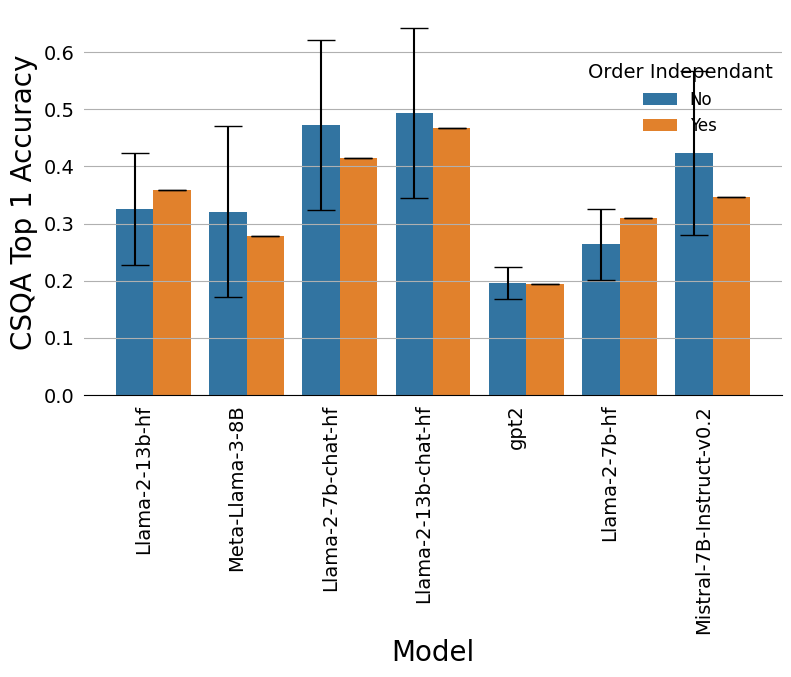

In [14]:
df_plot = pandas.DataFrame(plot_dat)
fig, ax = plt.subplots()
#ax = sns.barplot(x='Param', y='Value', data=df, hue='Name', palette='CMRmap_r')
seaborn.barplot(
    x = 'model',
    y = 'acc',
    data =df_plot,
    hue ='oid',
    #yerr = df_plot['error'],
    ax = ax
)

err_patches =  ax.patches[:7]
oid_patches =  ax.patches[7:-2]

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches][:-2]
y_coords = [p.get_height() for p in ax.patches][:-2]
ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in err_patches], y=[p.get_height() for p in err_patches], 
            yerr=df_plot[df_plot['oid'] == False]["error"], fmt="none", c="k")

ax.errorbar(x=[p.get_x() + 0.5 * p.get_width() for p in oid_patches], y=[p.get_height() for p in oid_patches], 
            yerr=df_plot[df_plot['oid'] == True]["error"], fmt="none", c="k")
#ax.set_ylim([.15,.5])
ax.set_xticklabels([l._text.split('/')[-1] for l in ax.get_xticklabels()], rotation=90, ha='right')
patches, labels = ax.get_legend_handles_labels()
label_map = {
    'True' : "Yes",
    "False" : "No",
}
labels = [label_map[l] for l in labels]
ax.legend(patches, labels,bbox_to_anchor=(.7,.9),loc = 'upper left', title='Order Independant')
ax.set_xlabel("Model")
ax.set_ylabel("CSQA Top 1 Accuracy")
order_independent_llm.plot_helpers.multi_savefig("CSQA-ACC-errors")

ValueError: 'yerr' (shape: (9,)) must be a scalar or a 1D or (2, n) array-like whose shape matches 'y' (shape: (1,))

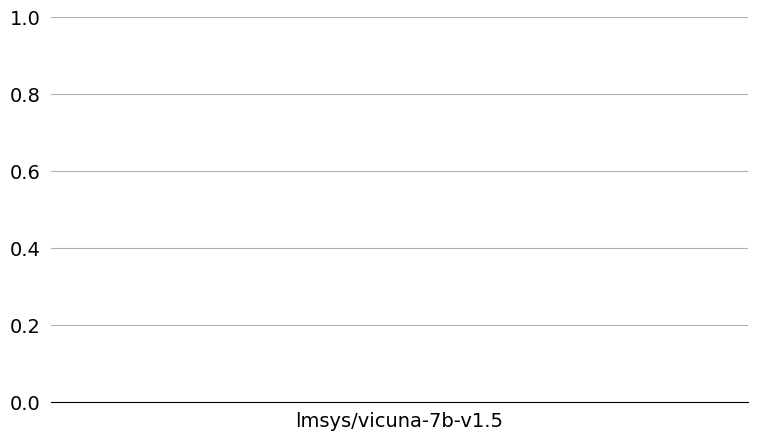

In [53]:
fig, ax = plt.subplots()
seaborn.barplot(
    x = 'model',
    y = df_plot['acc'],
    data =df_plot,
    yerr = df_plot['error'],
    ax = ax
)

In [45]:
df_plot

,model,acc,error,oid
0,lmsys/vicuna-7b-v1.5,0.328406,0.308593,0.338980
1,meta-llama/Llama-2-7b-chat-hf,0.424186,0.323170,0.367724
2,meta-llama/Llama-2-7b-hf,0.232933,0.246176,0.263423
3,meta-llama/Llama-2-13b-chat-hf,0.470400,0.285333,0.413733
4,meta-llama/Llama-2-13b-hf,0.304200,0.234400,0.293000
5,meta-llama/Meta-Llama-3-8B,0.344533,0.357733,0.275200
6,mistralai/Mistral-7B-Instruct-v0.2,0.444444,0.295111,0.389778
7,WizardLM/WizardLM-7B-V1.0,0.264667,0.000533,0.264800
8,gpt2,0.199774,0.072374,0.200595
